# Data Analysis and Data Science
## Be curious about the data 

By: Caroline Labelle
<br>For: BIM6065-65

<br>
Date: July 4th 2024

<hr style="border:1px solid black"> </hr>


## Importing the data

Once we've indified an interesting dataset, we need to import it. A great Python's library to do is Pandas.

Pandas is a library that have multiple functions to help with data manipulation and analysis.

In [3]:
## Import some library for DF manipulation
import pandas as pd

In [2]:
!ls

 bioinfo		       'notebook 3rd class.ipynb'   slurm-110598.out
 breast_cancer_metametric.tsv   Part_1-student.ipynb	    slurm-110627.out
 gene_expression_cancer_1.csv   Part_2-student.ipynb	    slurm-110715.out
 kmers.tsv		        seq_100.txt		    test.csv


In [4]:
## Define variable with file name
fn = "gene_expression_cancer_1.csv"

In [5]:
## Read ans save data into variable as a dataframe
data = pd.read_csv(fn, header=0)
# header: up to what row is the header (header = 1 row and everything above is voided)

In [19]:
## Show the first few rows of the dataset
data.head()

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured


What is our dataset?

<hr style="border:1px dashed black"> </hr>

## Exploring the data


In [8]:
### How many samples and variables do we have?
### We can use the shape function
data.shape

(150, 5)

In [20]:
### What are the variables?
### Given a dataframe, we can access its columns' names with df.columns
### We can obtain an array (list) of columns' names with .values
variables = data.columns.values
variables

array(['ESR1', 'PGR', 'BCL2', 'NAT1', 'Results'], dtype=object)

In [21]:
### What are the types of each variable?
### We can use the dtypes function to get the type of each columns
data.dtypes
# try to only have one type of variable per column

ESR1       float64
PGR        float64
BCL2       float64
NAT1       float64
Results     object
dtype: object

In [44]:
### For the numeric variables,
### what are the min. max, mean and median values?

num = data.loc[:, ("ESR1", "PGR", "BCL2", "NAT1")]

print("Min. values: ")
print(num.min())
print()

print("Max. values: ")
print(num.max())
print()

print("Mean. values: ")
print(num.mean())
print()

print("Median. values: ")
print(num.median())
print()

Min. values: 
ESR1    4.3
PGR     2.0
BCL2    1.0
NAT1    0.1
dtype: float64

Max. values: 
ESR1    7.9
PGR     4.4
BCL2    6.9
NAT1    2.5
dtype: float64

Mean. values: 
ESR1    5.843333
PGR     3.054000
BCL2    3.758667
NAT1    1.198667
dtype: float64

Median. values: 
ESR1    5.80
PGR     3.00
BCL2    4.35
NAT1    1.30
dtype: float64



In [46]:
### For the categorical variables, how many "categories" each has?
### We can use the nunique() function to calculate the number of unique elements in an array/list/column
print("Nb. of outcomes:", data.Results.nunique())

Nb. of outcomes: 3


In [47]:
### What are the Results values? 
### We can use the unique() function to get the unique elements in an array/list/column
print("Nb. of outcomes:", data.Results.unique())

Nb. of outcomes: ['Cured' 'Recurrence' 'Dead']


In [50]:
### Since we have different groups, let's group our data!
### What are the mean expression values for each group?

### OPTION 1: By Results
data.groupby("Results")

In [55]:
### OPTION 2: for each group
### Example to get mean expression by gene for the CURE group
data.loc[data.Results == "Cured", data.columns.values[0:4]].mean()
#must be done for every single group

ESR1    5.006
PGR     3.418
BCL2    1.464
NAT1    0.244
dtype: float64

In [57]:
### How many samples does each group contain?
### OPTION 1: By Results

data.groupby("Results").count()

,ESR1,PGR,BCL2,NAT1
Results,,,,
Cured,50,50,50,50
Dead,51,51,51,51
Recurrence,49,49,49,49


In [59]:
### OPTION 2: for each group
data.loc[data.Results == "Cured", data.columns.values[0:4]].count()
n_cured = data.loc[data.Results == "Cured", data.columns.values[0:4]].count()
n_dead = data.loc[data.Results == "Dead", data.columns.values[0:4]].count()
n_recurrence = data.loc[data.Results == "Recurrence", data.columns.values[0:4]].count()

print("N cured: ", n_cured)
print("N dead: ", n_dead)
print("N recurrence: ", n_recurrence)

N cured:  ESR1    50
PGR     50
BCL2    50
NAT1    50
dtype: int64
N dead:  ESR1    51
PGR     51
BCL2    51
NAT1    51
dtype: int64
N recurrence:  ESR1    49
PGR     49
BCL2    49
NAT1    49
dtype: int64


Based on these results, what hypothesis can you formulate?

<hr style="border:1px dashed black"> </hr>

## Visualize the data

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Example gallery: https://seaborn.pydata.org/examples/index.html<br>
Helpfull tutorial: https://seaborn.pydata.org/tutorial.html

In [61]:
## Import the seaborn library
## You might have to install it first!
import seaborn as sns

We can set global theme parameters (<code>sns.set_theme</code>) that will be apply to all plots.

Ressource: https://seaborn.pydata.org/generated/seaborn.set_theme.html

The <code>context</code> will affect things like the size of the labels, lines, and other elements of the plot, but not the overall style. You can choose between "notebook", "paper", "talk" and "poster".

The <code>style</code> will affect things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements. You can choose between "darkgrid", "whitegrid", "dark", "white", "ticks".

The <code>palette</code> will define the colors used when plotting.

In [82]:
sns.set(rc={'figure.figsize':(5, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

The general syntax to generat a ploft/figure with seaborn:

```python
sns.type_of_plot(data=data_df, x=col_name, (y=col_name), [ARGS])
```

<br><br>
For instance, we can generate a histogram plot of the ESR1 gene expression:

```python
sns.histplot(data, x="ESR1")
```

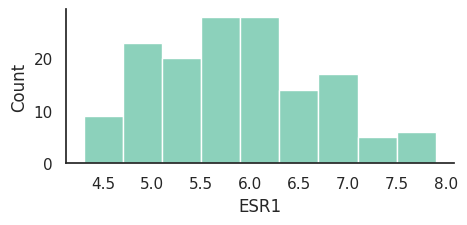

In [83]:
### Plot ESR1 expression as a histogram
sns.histplot(data, x="ESR1")
sns.despine()
#despine removes the box around the graph

### Exploring distribution of measurements 

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

Ressource: https://seaborn.pydata.org/generated/seaborn.histplot.html?highlight=histplot#seaborn.histplot

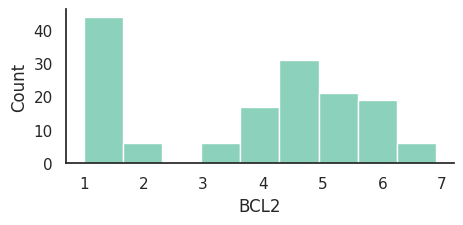

In [84]:
### We want to look a the distribution of measurements for BCL2
sns.histplot(data, x="BCL2")
sns.despine()

---
**bins => str, number, vector, or a pair of such values**<br>
Generic bin parameter that can be the name of a reference rule, the number of bins, or the breaks of the bins.

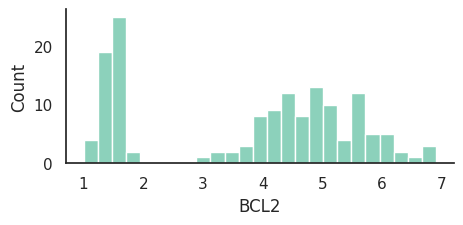

In [85]:
### Let's use more bins...
#bin = the box counting the amount of x in a specified range
sns.histplot(data, x="BCL2", bins = 25)
sns.despine()

---
**binwidth => number or pair of numbers** <br>
Width of each bin, overrides bins

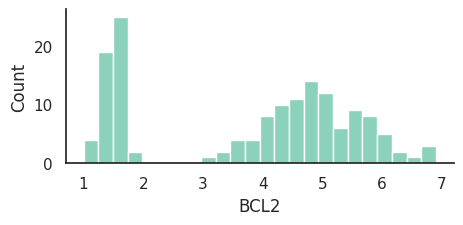

In [86]:
### Let's use smaller bins...
sns.histplot(data, x="BCL2", binwidth=0.25)
sns.despine()

---
**hue => vector or key in data**<br>
Semantic variable that is mapped to determine the color of plot elements.

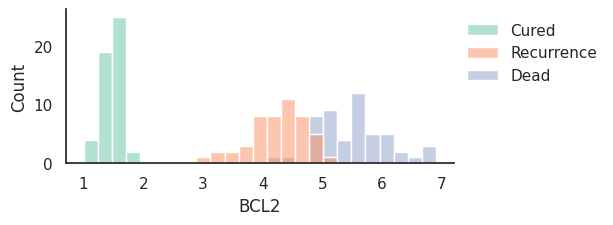

In [92]:
### We want the distribution to be results-specific
p = sns.histplot(data, x="BCL2", bins=25, hue="Results")

#move legend outside of the plot
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
sns.despine()

---
**multiple ==> {“layer”, “dodge”, “stack”, “fill”}** <br>
Approach to resolving multiple elements when semantic mapping creates subsets. Only relevant with univariate data.

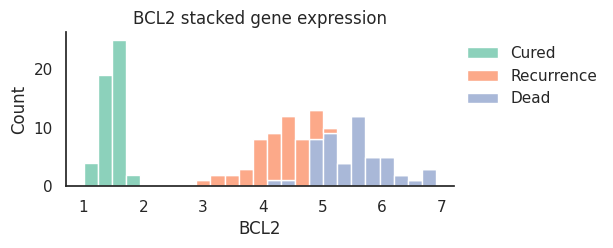

In [98]:
### Make our plot more readable
p = sns.histplot(data, x="BCL2", bins=25, hue="Results", multiple = "stack")
p.set_title("BCL2 stacked gene expression")

sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
sns.despine()

Once you have figure, you can save it in a vector format (<code>.pdf</code> or <code>.svg</code>). Figures can then be easily modified/edited in apps such as Illustrator and Affinity Design.

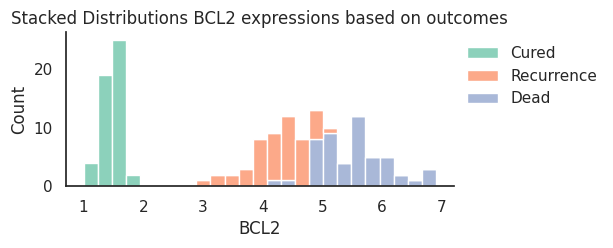

In [103]:
### Save your last figure as a pdf
p = sns.histplot(data, x="BCL2", bins=25, hue="Results", multiple="stack")
p.set_title("Stacked Distributions BCL2 expressions based on outcomes")

sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
sns.despine()
#compress it to get entire figures, need to download matplotlib.pyplot as plt
#plt.tight_layout()

#save:
fig = p.get_figure()
fig.savefig("Stacked Distributions BCL2 expressions based on outcomes")

We have been representing the distributions in terms of "count of occurrences" (y-axis). It is worth noting that the distribution statistic can easily be change with the <code>stat</code> argument.

**stat => {“count”, “frequency”, “density”, “probability”}**

Aggregate statistic to compute in each bin.
* **count** shows the number of observations
* **frequency** shows the number of observations divided by the bin width
* **density** normalizes counts so that the area of the histogram is 1
* **probability** normalizes counts so that the sum of the bar heights is 1

### Visualizing relationships

A scatterplot is a classic visualization tool that represents the relationship between <code>x</code> and <code>y</code>. Different subsets of the data can be shown by altering the color, size and style of the marker.

Even though it is possible to show up to three dimensions independently by using all three semantic types (color, size and style), this style of plot can be hard to interpret and is often ineffective.

Ressource: https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot

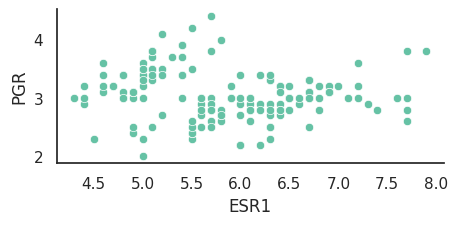

In [123]:
### We are interested in the relation between ESR1 and PGR expressions
### Plot this relation as a scatter plot
sns.scatterplot(data, x="ESR1", y="PGR")
sns.despine()

***
**hue => vector or key in data**<br>
Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

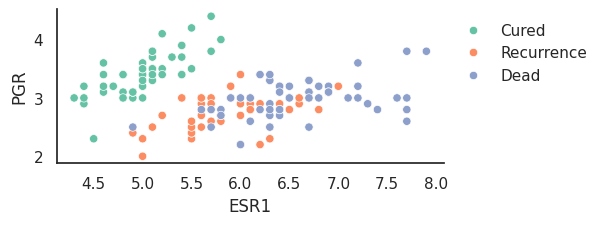

In [106]:
### Color the marker based on the outcomes
p = sns.scatterplot(data=data, x="ESR1", y="PGR", hue="Results")

sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
sns.despine()

***
**size => vector or key in data**<br>
Grouping variable that will produce points with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.
<br><br>
**style => vector or key in data**<br>
Grouping variable that will produce points with different markers. Can have a numeric dtype but will always be treated as categorical.

***
It is hard to fit multiple pairwise relationships from a dataset into a single plot. The rendered plot can be hard to read and interpret!

<br>
Instead of using <code>scatteplot</code>, let's try <code>pairplot</code>!

This  will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

Ressource: https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

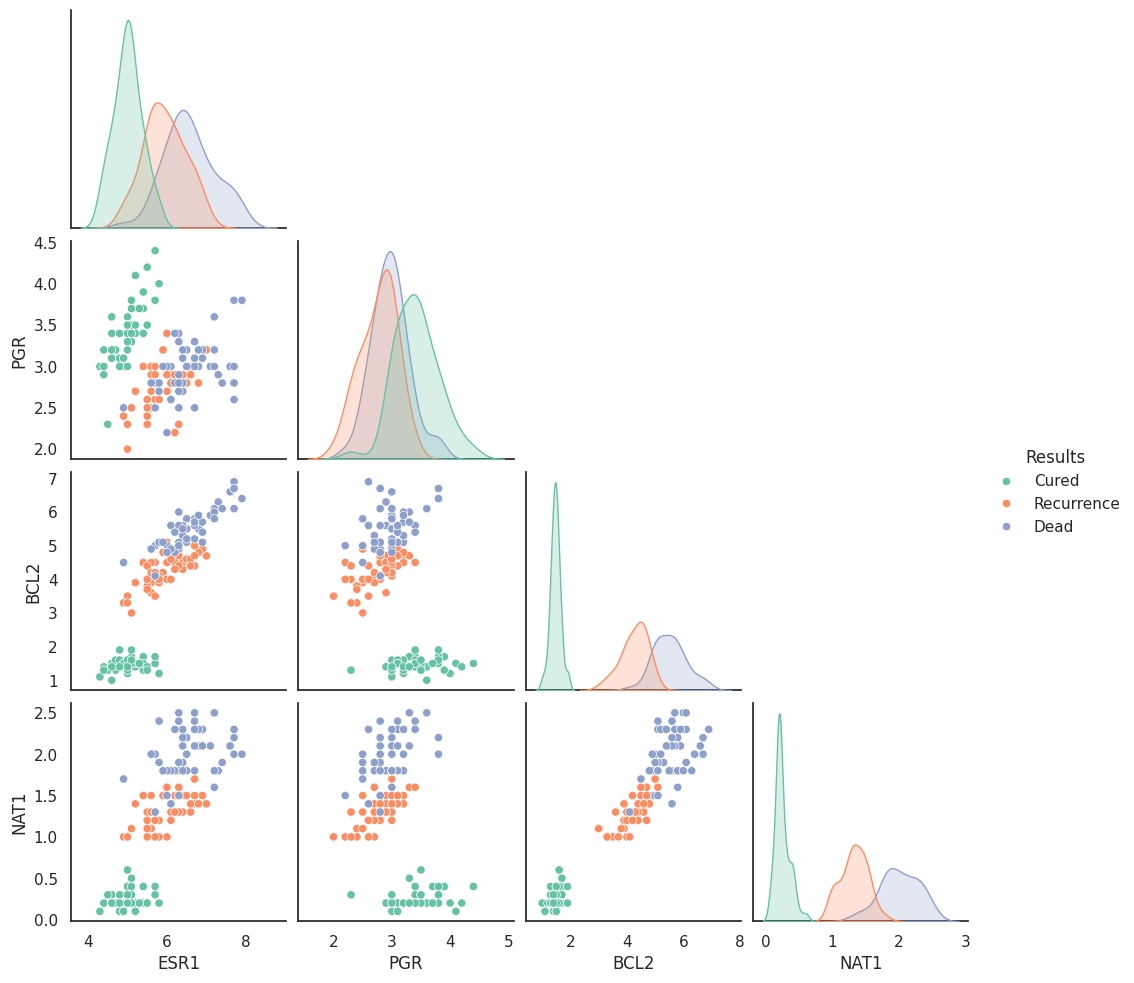

In [111]:
### Plot all pairwise relationships between all numeric variables
### Color samples based on the results
### The diagonal should contain histogram

sns.pairplot(data, corner=True, hue = "Results")
sns.despine()

There is some redundance in the figure obtained...

We can specify to plot only the lower triangle with <code>corner=True</code>.

What do you observe in the above figure?

### Visualizing statistical relationships

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. Seaborn can be very useful as it allows to use statistical models to estimate a simple relationship between two noisy sets of observations.

Remember that Seaborn is a *visualization* tool and not a statistical library: you test for linear and non-linear correlations between subsets but you will not have the associated coefficient or other statistical metrics.

The two main functions to visualize a linear relationship are <code>regplot()</code> and <code>lmplot()</code>. Both functions draw a scatterplot of two variables, <code>x</code> and <code>y</code>, and then fit the regression model <code>y ~ x</code> and plot the resulting regression line and a 95% confidence interval for that regression 

***
<code>lmplot()</code> combines <code>regplot()</code> with <code>FacetGrid</code> to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

Ressource: https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot

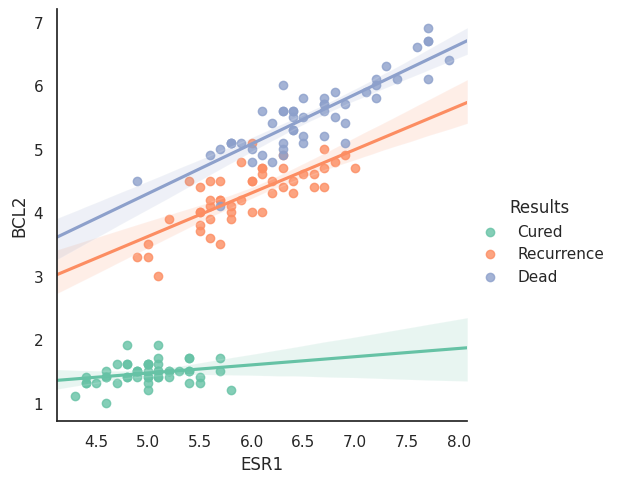

In [114]:
### Plot linear regression between ESR1 and BCL2
### The regression should be Results-specific
sns.lmplot(data, x="ESR1", y="BCL2", hue="Results", truncate=False)

sns.despine()

**truncate => bool, optional**

If True, the regression line is bounded by the data limits. If False, it extends to the x axis limits.

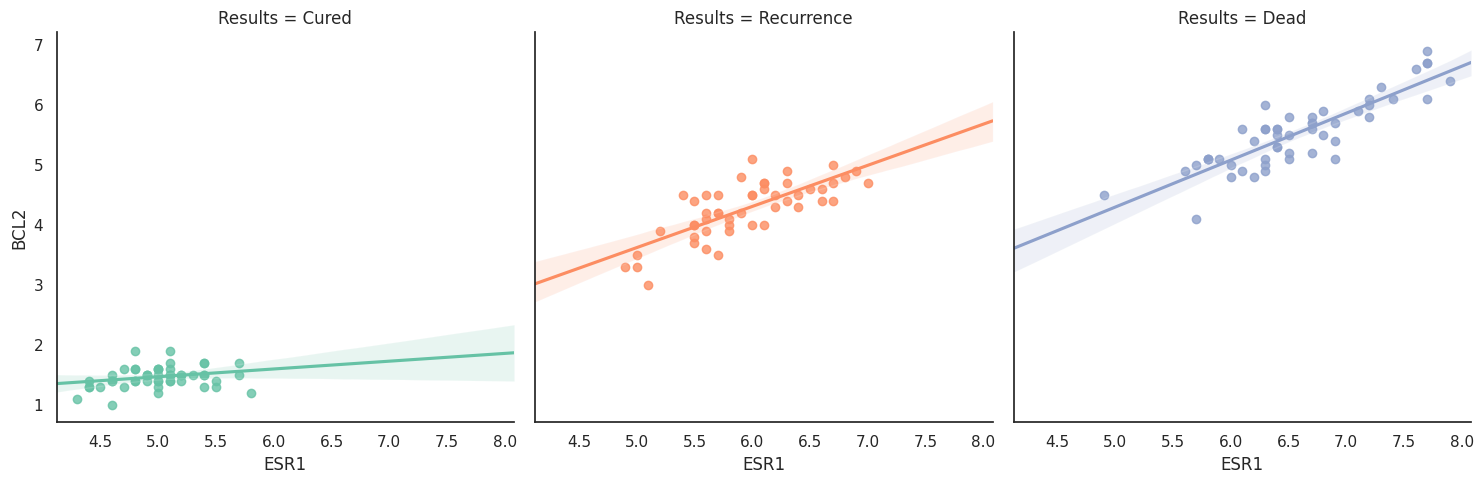

In [117]:
### Plot linear regression between ESR1 and BCL2
### The regression should be Results-specific
### We want a figure of 1 row and 3 columns: one column per species
sns.lmplot(data=data, x="ESR1", y="BCL2", truncate=False, col="Results", hue="Results")
sns.despine()

***
It is possible to only show the linear regresion, i.e. remove the scatter plot

**scatter => bool, optional**

If True, draw a scatterplot with the underlying observations (or the x_estimator values).

***
Various parameters of the linear regression can be adjusted for both <code>regplot()</code> and <code>lmplot()</code>:

* **ci => int in [0, 100] or None, optional** <br>Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None. 
<br>

* **x_estimator => callable that maps vector -> scalar, optional** <br>Apply this function to each unique value of x and plot the resulting estimate. This is useful when x is a discrete variable. If x_ci is given, this estimate will be bootstrapped and a confidence interval will be drawn.
<br>

* **logistic => bool, optional** <br>If True, assume that y is a binary variable and use statsmodels to estimate a logistic regression model. Note that this is substantially more computationally intensive than linear regression, so you may wish to decrease the number of bootstrap resamples (n_boot) or set ci to None.
<br>

* **logx => bool, optional** <br>If True, estimate a linear regression of the form y ~ log(x), but plot the scatterplot and regression model in the input space. Note that x must be positive for this to work.
<br>



### Other interesting visualisation

<code>jointplot()</code> will draw a plot of two variables with bivariate and univariate graphs.

Ressource: https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

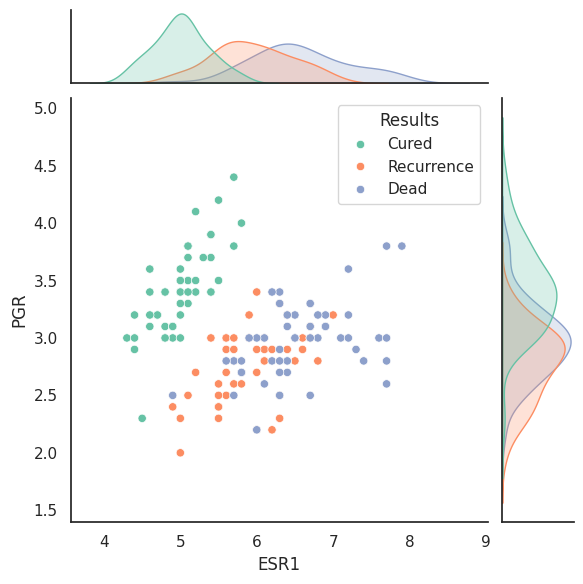

In [118]:
sns.jointplot(data=data, x="ESR1", y="PGR", hue="Results")
sns.despine()

<code>catplot()</code> will draw a scatterplot of categorical values. It can be modified to return boxplots.

Ressource: https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

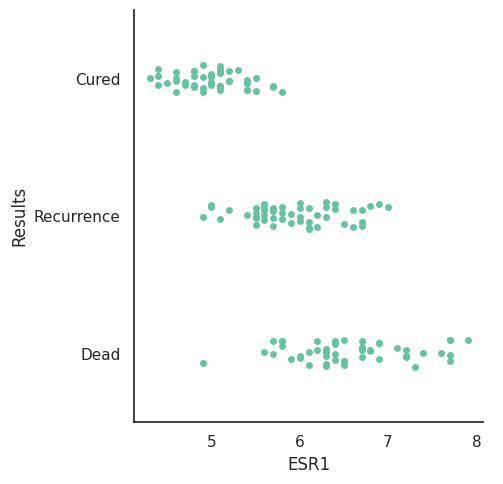

In [119]:
sns.catplot(data=data, x="ESR1", y="Results")
sns.despine()

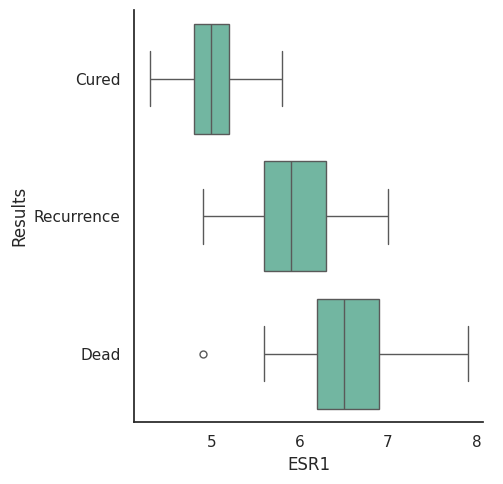

In [124]:
sns.catplot(data=data, x="ESR1", y="Results", kind="box")
sns.despine()

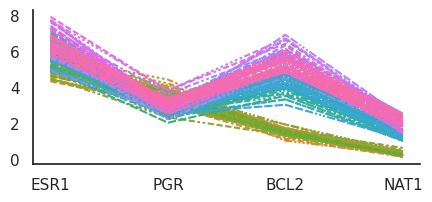

In [122]:
sns.lineplot(data=data.iloc[:,0:4].T, legend=False)
sns.despine()